In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [2]:
# For Weather Data
"""
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
"""

"\nzip_path = tf.keras.utils.get_file(\n    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',\n    fname='jena_climate_2009_2016.csv.zip',\n    extract=True)\ncsv_path, _ = os.path.splitext(zip_path)\n"

In [3]:
df_corona = pd.read_csv('./novel-corona-virus-2019-dataset/covid-confirmed-cases-since-100th-case.csv')
df_corona.head()

,Entity,Code,Date,(cases),Number of days since the 100th confirmed case (days)
0,Afghanistan,AFG,"Dec 31, 2019",0.0,NaN
1,Afghanistan,AFG,"Jan 1, 2020",0.0,NaN
2,Afghanistan,AFG,"Jan 2, 2020",0.0,NaN
3,Afghanistan,AFG,"Jan 3, 2020",0.0,NaN
4,Afghanistan,AFG,"Jan 4, 2020",0.0,NaN


In [4]:
df_china = df_corona[' (cases)'][df_corona['Code'] == 'CHN'].dropna()
df_china.index = pd.to_datetime(df_corona['Date'][df_corona['Code'] == 'CHN'].dropna(), infer_datetime_format=True) 

In [5]:
df_china.head()

Date
2019-12-31    27.0
2020-01-01    27.0
2020-01-02    27.0
2020-01-03    44.0
2020-01-04    44.0
Name:  (cases), dtype: float64

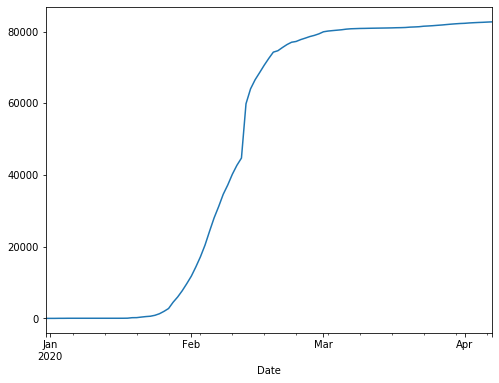

In [6]:
df_china.plot()

### Lockdown in China started on 23rd January

In [9]:
# from sklearn.model_selection import train_test_split
# X_train, X_test = train_test_split(df_china, test_size=0.8, random_state=3)
TRAIN_SPLIT = 45 # 300000 for weather data
tf.random.set_seed(13)
df_china = df_china.values

df_china_mean = df_china[:TRAIN_SPLIT].mean()
df_china_std = df_china[:TRAIN_SPLIT].std()
df_china = (df_china - df_china_mean)/df_china_std

In [ ]:
univariate_past_history = 8
univariate_future_target = 0
# print(uni_data)
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)
x_train_uni.shape, y_train_uni.shape, x_val_uni.shape, y_val_uni.shape

# UK

In [12]:
df_uk = df_corona[' (cases)'][df_corona['Code'] == 'GBR'].dropna()
df_uk.index = pd.to_datetime(df_corona['Date'][df_corona['Code'] == 'GBR'].dropna(), infer_datetime_format=True)

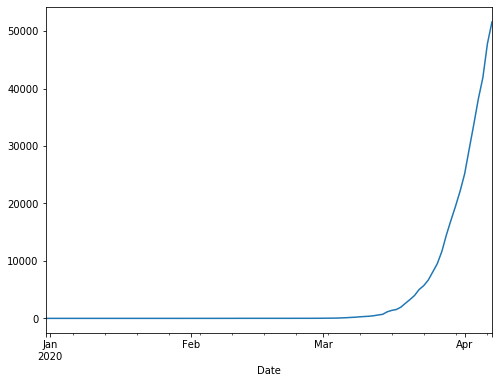

In [13]:
df_uk.plot()

In [6]:
# df = pd.read_csv(csv_path)  # for weather data
df = pd.read_csv('./Historic COVID-19 Dashboard Data.csv')
df.head()

,Date,Cases,Cumulative Cases,Deaths,Cumulative Deaths UK,Cumulative Deaths England,Cumulative Deaths Northern Ireland,Cumulative Deaths Scotland,Cumulative Deaths Wales,Cumulative Recovered Patients
0,31/01/2020,2.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN
1,01/02/2020,0.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN
2,02/02/2020,0.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN
3,03/02/2020,0.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN
4,04/02/2020,0.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN


In [7]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        #     data.append(dataset[indices].values.reshape(history_size, 1)) # For weather data
        data.append(np.reshape(dataset[indices], (history_size, 1)))

#         data.append(dataset[i-history_size:i].values.reshape(history_size, 1))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [6]:
TRAIN_SPLIT = 45 # 300000 for weather data
tf.random.set_seed(13)

In [7]:
# uni_data = df['T (degC)']
# uni_data.index = df['Date Time']

uni_data = df['Cumulative Cases']
uni_data.index = df['Date']
uni_data.head()

Date
31/01/2020    2.0
01/02/2020    2.0
02/02/2020    2.0
03/02/2020    2.0
04/02/2020    2.0
Name: Cumulative Cases, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc68d9f28d0>],
      dtype=object)

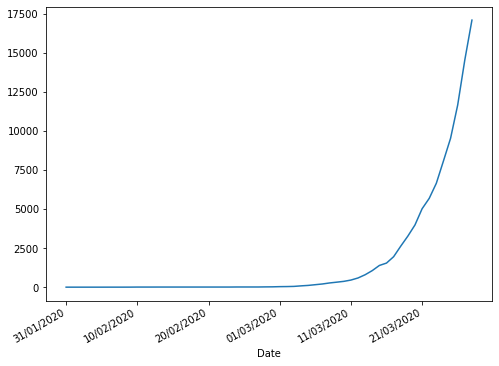

In [8]:
uni_data.plot(subplots=True)
# plt.plot(uni_data.index, uni_data, '*')
# plt.plot(kind='scatter', subplots=True)

In [9]:
uni_data = uni_data.dropna()
# print(uni_data)
# uni_data = tf.keras.utils.normalize(uni_data, axis=-1, order=0)
uni_data = uni_data.values

uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data-uni_train_mean)/uni_train_std
# 

In [10]:
univariate_past_history = 8
univariate_future_target = 0
# print(uni_data)
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)
x_train_uni.shape, y_train_uni.shape, x_val_uni.shape, y_val_uni.shape

((37, 8, 1), (37,), (5, 8, 1), (5,))

In [11]:
def create_time_steps(length):
    return list(range(-length, 0))

def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
                   label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt


In [12]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target Cumulative Cases to predict')
print (y_train_uni[0])

Single window of past history
[[-0.46599965]
 [-0.46599965]
 [-0.46599965]
 [-0.46599965]
 [-0.46599965]
 [-0.46599965]
 [-0.46256363]
 [-0.46256363]]

 Target Cumulative Cases to predict
-0.4625636325920301


<module 'matplotlib.pyplot' from '/home/ash/Ash/venv3.6_tf_2/lib/python3.6/site-packages/matplotlib/pyplot.py'>

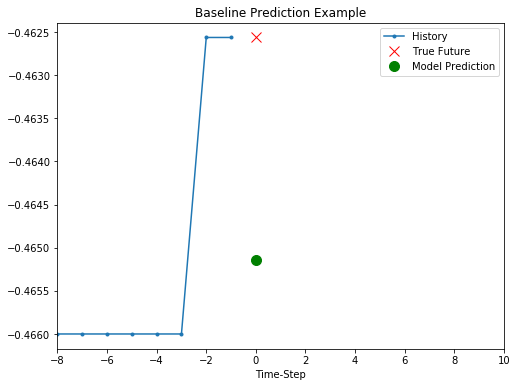

In [13]:
# show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')
def baseline(history):
    return np.mean(history)

show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [20]:
# BATCH_SIZE = 30
# BUFFER_SIZE = 100

BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
type(train_univariate), type(val_univariate)

(tensorflow.python.data.ops.dataset_ops.RepeatDataset,
 tensorflow.python.data.ops.dataset_ops.RepeatDataset)

In [21]:
x_train_uni.shape[-2:], x_train_uni.shape

((8, 1), (37, 8, 1))

In [22]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [23]:
for x, y in val_univariate.take(1):
#     print(x, y)
    print(simple_lstm_model.predict(x).shape)

(5, 1)


In [25]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=20, shuffle=False)


Train for 200 steps, validate for 20 steps
Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 0.1396 - val_loss: 38.5710
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0639 - val_loss: 37.3177
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0279 - val_loss: 36.7420
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0148 - val_loss: 36.7013
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0127 - val_loss: 36.6891
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0118 - val_loss: 36.6944
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0111 - val_loss: 36.7152
Epoch 8/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0102 - val_loss: 36.7220
Epoch 9/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0096 - val_loss: 36.7090
Epoch 10/10
200/200 [===========================

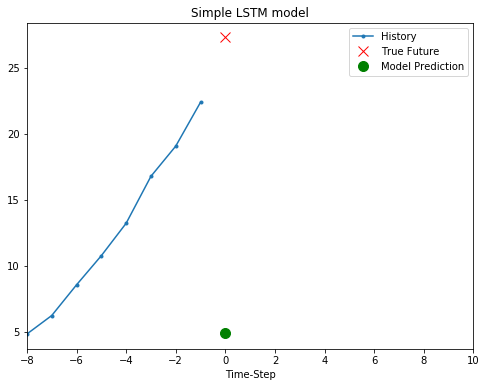

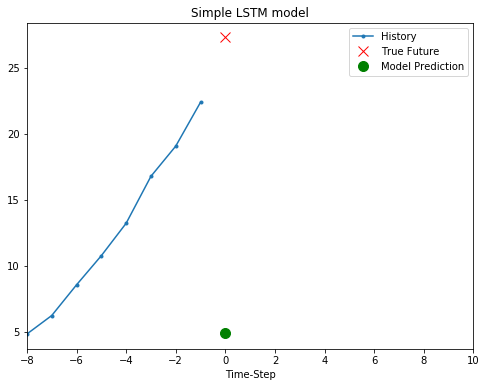

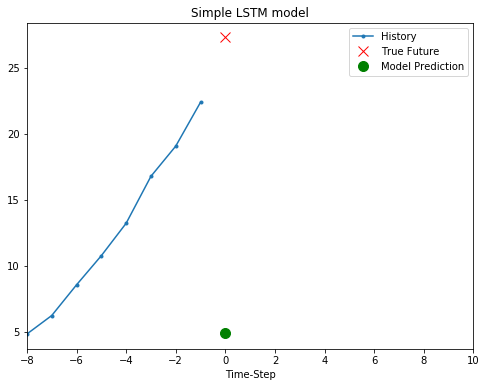

In [26]:
for x, y in val_univariate.take(3):
   plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
   plot.show()